#                                    Presented By -  Ranjan Das
## Data Science and Business Analytics Intern at The Spark Foundation


## Task - 6: Pediction Using Decision Tree

## Importing Libraries

In [1]:
# importing most fundamental Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

## Importing our dataset for analysis

In [2]:
## url = "http://bit.ly/w-data"
mydf = pd.read_csv(r'https://raw.githubusercontent.com/Ranjan-Das-cloud/TheSparksFoundation-task6/main/raw-data/Iris.csv')
print("Dataset has been imported successfully!!")

Dataset has been imported successfully!!


In [3]:
mydf.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
73,74,6.1,2.8,4.7,1.2,Iris-versicolor
47,48,4.6,3.2,1.4,0.2,Iris-setosa
128,129,6.4,2.8,5.6,2.1,Iris-virginica
64,65,5.6,2.9,3.6,1.3,Iris-versicolor
6,7,4.6,3.4,1.4,0.3,Iris-setosa
135,136,7.7,3.0,6.1,2.3,Iris-virginica
74,75,6.4,2.9,4.3,1.3,Iris-versicolor
11,12,4.8,3.4,1.6,0.2,Iris-setosa
14,15,5.8,4.0,1.2,0.2,Iris-setosa
140,141,6.7,3.1,5.6,2.4,Iris-virginica


In [4]:
mydf.shape

(150, 6)

In [5]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


## Exploratory Data Analysis (EDA) and Data Preprocessing

In [6]:
mydf.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### Observation - 1 : Hence, there is no NaN or null data present in our dataset.¶

In [7]:
mydf.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
119,120,6.0,2.2,5.0,1.5,Iris-virginica
21,22,5.1,3.7,1.5,0.4,Iris-setosa
34,35,4.9,3.1,1.5,0.1,Iris-setosa
136,137,6.3,3.4,5.6,2.4,Iris-virginica
22,23,4.6,3.6,1.0,0.2,Iris-setosa
39,40,5.1,3.4,1.5,0.2,Iris-setosa
127,128,6.1,3.0,4.9,1.8,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa
60,61,5.0,2.0,3.5,1.0,Iris-versicolor


#### We are taking here all the columns except Id column as We don't need to have Id column and Hence, We are omitting it and taking the rest columns.

In [8]:
# Removing Id column and saving others columns
mydf = mydf[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']]
mydf.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
mydf.iloc[45:56]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
45,4.8,3.0,1.4,0.3,Iris-setosa
46,5.1,3.8,1.6,0.2,Iris-setosa
47,4.6,3.2,1.4,0.2,Iris-setosa
48,5.3,3.7,1.5,0.2,Iris-setosa
49,5.0,3.3,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [10]:
mydf.iloc[90:106]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
90,5.5,2.6,4.4,1.2,Iris-versicolor
91,6.1,3.0,4.6,1.4,Iris-versicolor
92,5.8,2.6,4.0,1.2,Iris-versicolor
93,5.0,2.3,3.3,1.0,Iris-versicolor
94,5.6,2.7,4.2,1.3,Iris-versicolor
95,5.7,3.0,4.2,1.2,Iris-versicolor
96,5.7,2.9,4.2,1.3,Iris-versicolor
97,6.2,2.9,4.3,1.3,Iris-versicolor
98,5.1,2.5,3.0,1.1,Iris-versicolor
99,5.7,2.8,4.1,1.3,Iris-versicolor


In [11]:
# Calculating the number of Species in the range (0,50)
(mydf.iloc[0:50].Species).value_counts()

Iris-setosa    50
Name: Species, dtype: int64

In [12]:
# Calculating the number of Species in the range (50,100)
(mydf.iloc[50:100].Species).value_counts()

Iris-versicolor    50
Name: Species, dtype: int64

In [13]:
# Calculating the number of Species in the range (0,50)
(mydf.iloc[100:150].Species).value_counts()

Iris-virginica    50
Name: Species, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [15]:
mydf['Species'] = encoder.fit_transform(mydf['Species'])

In [16]:
mydf.sample(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
108,6.7,2.5,5.8,1.8,2
96,5.7,2.9,4.2,1.3,1
146,6.3,2.5,5.0,1.9,2
63,6.1,2.9,4.7,1.4,1
85,6.0,3.4,4.5,1.6,1
75,6.6,3.0,4.4,1.4,1
15,5.7,4.4,1.5,0.4,0
100,6.3,3.3,6.0,2.5,2
110,6.5,3.2,5.1,2.0,2
86,6.7,3.1,4.7,1.5,1


### Observation -2: We can undoubtedly consider that,
#### 1. First 50 samples out of 150 samples, are 'Iris-satosa' and which is labelled by '0' after Label Encodeing.
#### 2. The next 50 sampples are 'Iris-versicolor' and which is labelled by '1' after Label Encoding.
#### 3. The last 50 samples are 'Iris-verginica' and which is labelled by '2' after Label Encoding.

In [17]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.3 KB


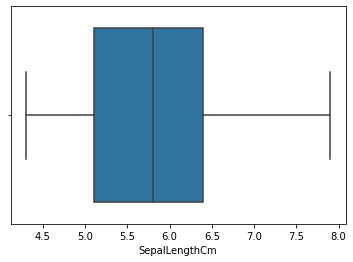

In [18]:
sb.boxplot(mydf['SepalLengthCm'])
plt.show()

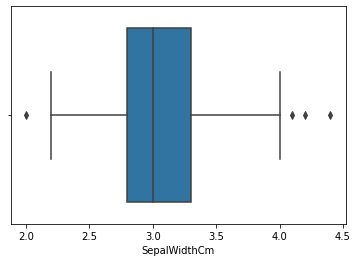

In [19]:
sb.boxplot(mydf['SepalWidthCm'])
plt.show()

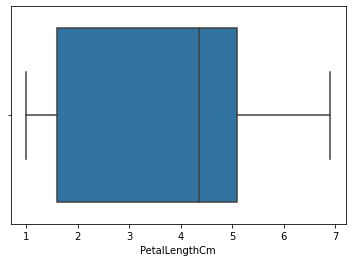

In [20]:
sb.boxplot(mydf['PetalLengthCm'])
plt.show()

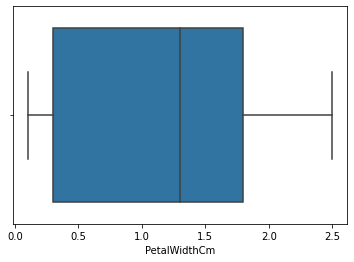

In [21]:
sb.boxplot(mydf['PetalWidthCm'])
plt.show()

#### Observation -3: As we can see there is only one or two outliers present in case of distribution of data in the 'SepalWidthCm' column and at that instance, the corresponding distribution in other column has no outlier. So, we are not going to drop one or two rows out of 150 rows from our dataset to build decision tree as the effect of outliers is extremely less in this case. 
#### Hence, we look forward to train our model.

### Preparing the data [Extracting input columns/features and output column/target from dataset]

In [22]:
X = mydf.iloc[:,0:4].values
y = mydf.iloc[:,-1].values

In [23]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [24]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Training the model

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
clf = DecisionTreeClassifier()

In [28]:
clf.fit(X_train,y_train)

DecisionTreeClassifier()

## Testing our model 

In [29]:
y_pred = clf.predict(X_test)

In [30]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

#### Accuracy of the model after Prediction

In [31]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [32]:
accuracy_score = accuracy_score(y_test, y_pred)
accuracy_score

1.0

In [33]:
print('Confusion Matrix: \n\n', confusion_matrix(y_test, y_pred))

Confusion Matrix: 

 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [34]:
print('Classification Report: \n\n', classification_report(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [35]:
print('The accuracy of our model is : {} %'.format(accuracy_score * 100))

The accuracy of our model is : 100.0 %


#### As we can see, the accuracy of out model is 100 % , Hence we are not going to tune the other Hyperparameters except max_width as max_width is essential to plot any kind of Decision Tree with more optimized and suitable manner.

##### Now We'll go to proceed the steps for optimizing max_depth of our Decision Tree to plot the most efficient and suitable tree for our model ( or in case of any other test / sample model in future)

## Hyperparameter tuning for our DecisionTreeClassifier and setting optimum max_depth

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
training_accuracy = []

for i in range(1,21):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train,y_train)
    training_accuracy.append(r2_score(y_train,clf.predict(X_train)))

In [38]:
print('Variation of training accuracy : \n\n {}'.format(training_accuracy))

Variation of training accuracy : 

 [0.5062770334423463, 0.9240426205295917, 0.9367021837746597, 0.9620213102647959, 0.987340436754932, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [39]:
testing_accuracy = []

for i in range(1,21):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train,y_train)
    var_y_pred = clf.predict(X_test)
    #acc_score = mean_squared_error(y_test, var_y_pred)
    acc_score = r2_score(y_test, var_y_pred)
    testing_accuracy.append(acc_score)

In [40]:
print('Variation of traing accuracy : \n\n {}'.format(testing_accuracy))

Variation of traing accuracy : 

 [0.4753577106518283, 0.9523052464228935, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [41]:
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

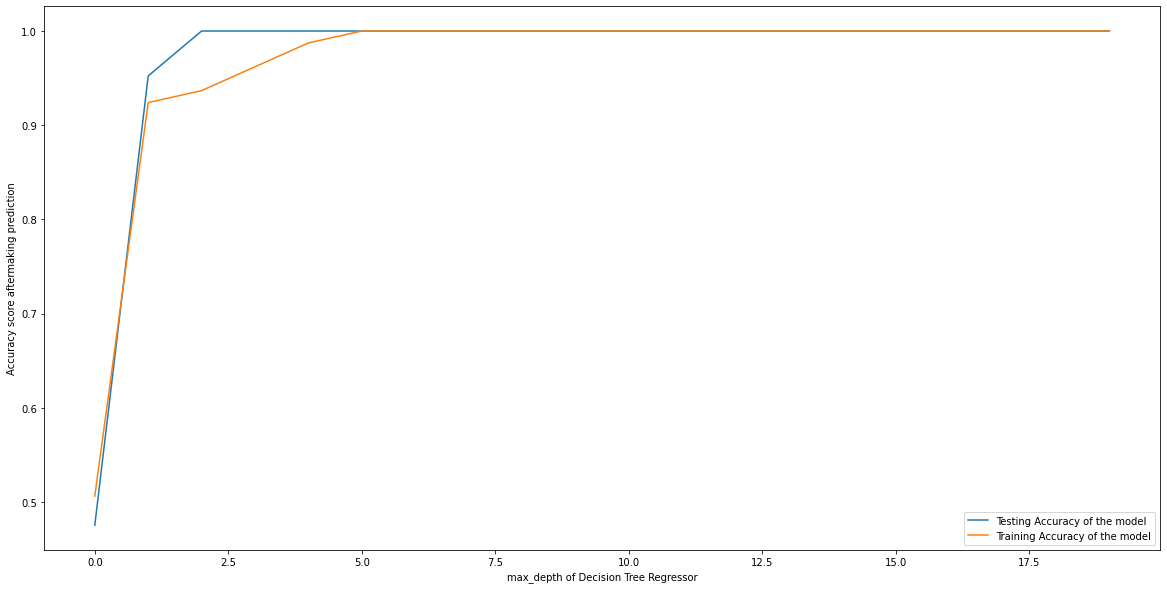

In [42]:
plt.plot(range(0,20), testing_accuracy, label="Testing Accuracy of the model")
plt.plot(range(0,20), training_accuracy, label="Training Accuracy of the model")
plt.ylabel('Accuracy score aftermaking prediction')
plt.xlabel('max_depth of Decision Tree Regressor')
plt.legend()
plt.show()

### As we can see the training and testing accuracy reaches at its maximum value when max_depth is 6, hence we can confirm at this point our model is going to be performed best for both the training and testing dataset of similar type as we have imported earlier.

### This is how we usually decide what should be the max_depth of any decision tree and in case of our model, max_depth is found to be 6. 

#### tuning the hyperparameters of plot_tree method of sklearn and plotting the final optimum decision tree

In [43]:
## Initialization of the testing dataset as our whole dataframe assuming as a separate dataset
X = mydf.iloc[:,0:4].values
y = mydf.iloc[:,-1].values

In [44]:
clf_optimized = DecisionTreeClassifier(max_depth=6)

In [45]:
clf_optimized.fit(X,y)

DecisionTreeClassifier(max_depth=6)

In [46]:
from sklearn.tree import plot_tree

In [47]:
plot_tree(clf_optimized)

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

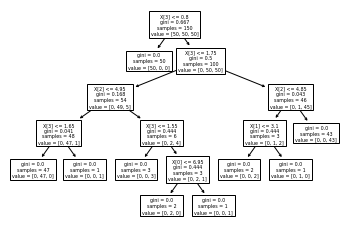

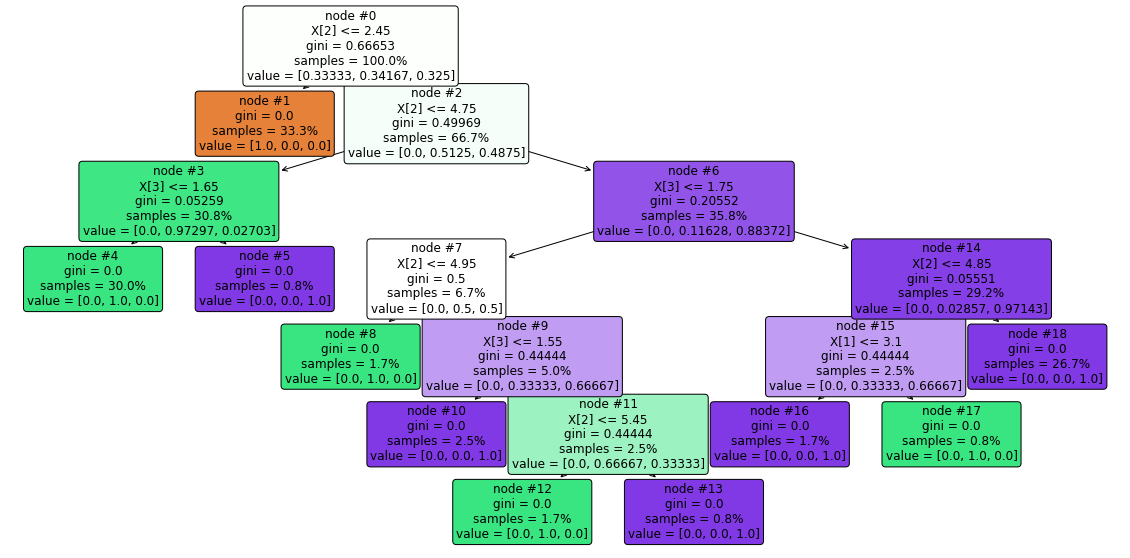

In [48]:
# plot tree
plt.figure(figsize=(20,10))  # set plot size (denoted in inches)
plot_tree(clf, max_depth = 6, filled = True, node_ids = True, proportion = True, rounded = True, precision = 5, fontsize=12)
plt.show()

### You can now feed any new/test data to this classifer and it would be able to predict the right class accordingly. 

<center style="color: red; text-shadow: 0 0 3px #FF0000, 0 0 5px #0000FF; background-color: #ff9999; padding: 20px; border-radius: 8px; font-size: 43px">Thank You !</center>